# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment. 

**TO ENSURE THAT THE CORRECT STYLING IS APPLIED TO YOUR FIGURES, RUN THIS CELL TWO TIMES BEFORE YOU RUN ANY OTHER CELLS!!**


In [1]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16
!pip install -U statsmodels

from IPython.display import display_html
def restartkernel() :
  print("restarting kernel to reflect package installation")
  display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

restartkernel()


import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e4.sh > fetch_e4.sh
!bash fetch_e4.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')
can_openers = pd.read_csv('can_openers.csv', parse_dates=['month']).set_index('month')
quarterly_sales = pd.read_csv('quarterly_sales.csv', parse_dates=['date']).set_index('date')

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import STL


     |████████████████████████████████| 9.5MB 5.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
restarting kernel to reflect package installation


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   586  100   586    0     0   3708      0 --:--:-- --:--:-- --:--:--  3708
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   2734      0 --:--:-- --:--:-- --:--:--  2722
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  20246      0 --:--:-- --:--:-- --:--:-- 20246
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   1991      0 --:--:-- --:--:-- --:--:--  2000
  % Total    % Received % Xferd  Average Speed   Tim

# Question 1: Moving Average Forecasts

Given the data in the `french_index` series, answer questions 1a - 1c below.


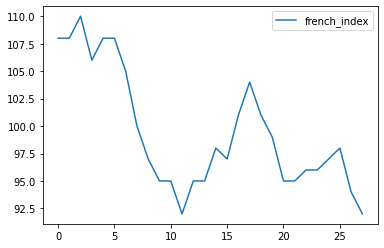

In [2]:
french_index = pd.DataFrame([
  108, 108, 110, 106, 108, 108, 105, 100, 97, 95, 95, 92, 95, 95, 
  98, 97, 101, 104, 101, 99, 95, 95, 96, 96, 97, 98, 94, 92
], columns=['french_index'])

french_index.plot()

## 1a. Compute an **MA(3)** Forecast

Compute an **MA(3)** forecast for the data, and assign the output to a new column called `MA3_forecast`. Remember that a moving average forecast **MA(k)** just a moving average smoother **kMA** with a `shift` of `(k + 1) / 2`! 

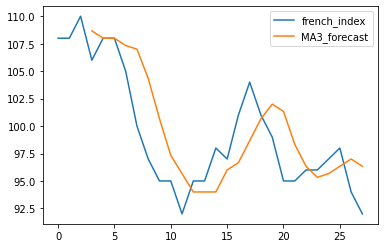

In [3]:
# YOUR CODE HERE

french_index['MA3_forecast'] = french_index['french_index'].rolling(3, center=True).mean().shift(2)

french_index.plot()

## 1b. Check the Forecast Accuracy

Compute the mean squared error between the forecast and the original data, using the following steps:
```
error = french_index['french_index'] - french_index['MA3_forecast']
squared_error = error**2
mean_squared_error = squared_error.mean()
print(mean_squared_error)
```


*Note: you can use this code as is (just copy and paste) to compute the MSE here (as long as you've named the columns correctly above). Below you'll modify it slightly to compute the error of the next forecast*

In [4]:
# YOUR CODE HERE

error = french_index['french_index'] - french_index['MA3_forecast']
squared_error = error**2
mean_squared_error = squared_error.mean()
print(mean_squared_error)

13.031111111111102


## 1c. **MA(5) forecast and error comparison**

 Redo the previous two steps, but for an **MA(5)** forecast, creating a new `MA5_forecast` column in your `DataFrame`, and once again, compute and print the mean_squared error. Which moving average forecast has the lowe error?

20.79304347826088


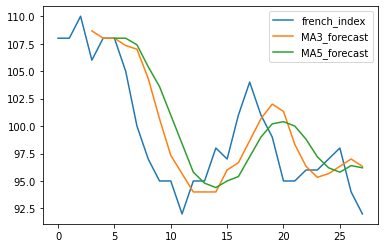

In [5]:
# YOUR CODE HERE

french_index['MA5_forecast'] = french_index['french_index'].rolling(5, center=True).mean().shift(3)

french_index.plot()

error = french_index['french_index'] - french_index['MA5_forecast']
squared_error = error**2
mean_squared_error = squared_error.mean()
print(mean_squared_error)

# Question 2: Holt-Winters Forecast

Using the `airline_series` `DataFrame`, compute several variations of Holt-Winters forecasts, plot and discuss why one methods works better than another. 

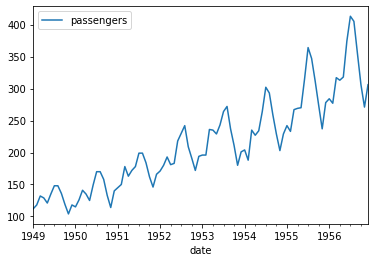

In [6]:
airline_series.plot()

## 2a. Varying the smoothing parameters

Modify the code below to try the following combinations of `smoothing_level`, `smoothing_alpha`, and `smoothing_slope`. 
* Combination 1: 
  * `smoothing_level=0.01`
  * `smoothing_slope=0.01`
  * `smoothing_seasonal=0.01`
* Combination 2: 
  * `smoothing_level=0.5`
  * `smoothing_slope=0.5`
  * `smoothing_seasonal=0.5`

* Combination 3: 
  * `smoothing_level=0.9`
  * `smoothing_slope=0.9`
  * `smoothing_seasonal=0.8`

Which has the best fit (lowest `MAPE` as printed at the top of the plot). Which has the worst fit? Why do you think the worst one does so poorly?



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0.5, 1.0, 'MAPE: 0.2923')

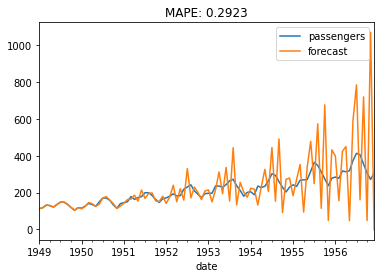

In [7]:
model = ExponentialSmoothing(
    endog=airline_series['passengers'], 
    trend='add', 
    seasonal='mul',
    seasonal_periods=12
    )

# MODIFY THE INPUT VALUES TO .fit() to 
# SPECIFY THE SMOOTHING PARAMETERS
results = model.fit(
    smoothing_level = 0.9,
    smoothing_slope=0.9, 
    smoothing_seasonal=0.8
)

######################################
#
# DO NOT MODIFY CODE BELOW THIS LINE!
#
######################################

airline_series['forecast'] = results.fittedvalues

airline_series.plot()

MAPE = (abs(airline_series['passengers'] - airline_series['forecast'])/airline_series['passengers']).mean()

plt.title('MAPE: {:.4f}'.format(MAPE))

## 2b. Varying the type of trend and seasonal

Modify the code below to try the following combinations of `trend`, and `seasonal`:
* Combination 1: 
  * `trend='add'`
  * `seasonal='mul'`
* Combination 2: 
  * `trend='mul'`
  * `seasonal='mul'`
* Combination 3: 
  * `trend='add'`
  * `seasonal='add'`
* Combination 4: 
  * `trend='mul'`
  * `seasonal='add'`

Which has the best fit (lowest `MAPE` as printed at the top of the plot). Which has the worst fit? Why do you think the worst one does so poorly?



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'MAPE: 0.0338')

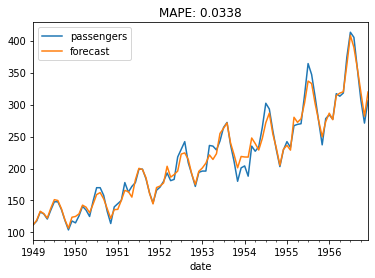

In [8]:
# MODIFY THE INPUT VALUES TO ExponentialSmoothing() to 
# SPECIFY THE TREND AND SEASONAL TYPE

model = ExponentialSmoothing(
    endog=airline_series['passengers'], 
    trend='mul', 
    seasonal='add',
    seasonal_periods=12
    )

######################################
#
# DO NOT MODIFY CODE BELOW THIS LINE!
#
######################################

results = model.fit()

airline_series['forecast'] = results.fittedvalues

airline_series.plot()

MAPE = (abs(airline_series['passengers'] - airline_series['forecast'])/airline_series['passengers']).mean()

plt.title('MAPE: {:.4f}'.format(MAPE))

# Question 3: STL Decomposition

Compute several STL decompositions of the `quarterly_sales` data with several parameter sets, and discuss the performance of each decomposition

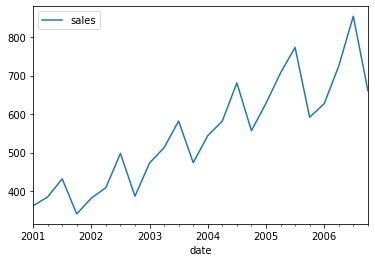

In [9]:
quarterly_sales.plot()

## 3a. Compute an STL decomposition for the following sets of parameters by modifying the code below.

* Combination 1: 
  * `seasonal=3`
  * `trend=5`
* Combination 2: 
  * `seasonal=3`
  * `trend=15`

Which has the best fit (lowest `MSE` as printed directly below the code cell). Which has the worst fit? 

Look closely at the residuals in the plots, do you notice any pattern (seasonal or trend) in Combination 1? Any in Combination 2?

MSE: 972.3928537987487


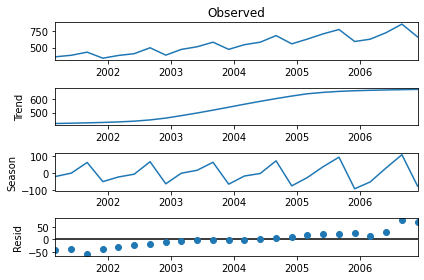

In [10]:
stl = STL(
    endog=quarterly_sales,
    period=4, 
    seasonal=3,
    trend=15,
    seasonal_deg=0, 
    trend_deg=0,
    robust=True
    )
results = stl.fit()

my_figure = results.plot()

MSE = (results.resid**2).mean()

print(f"MSE: {MSE}")

# Question 4: Makridakis 3.3

For quarterly data, an early step in seasonal adjustment often involves applying a moving average smoother of length 4 followed by a moving average of length 2.
* a) Explain the choice of the smoother lengths in about two sentences.
* b) Write the whole smoothing operation as a single weighted moving average by finding the appropriate weights.

# Question 5: Makridakis 3.8

Figure 3-13 shows the result of applying STL to the number of persons in the civilian labor force in Australia each month from February 1978 to August 1995.

* a) Say which quantities are plotted in each graph.
* b) Write about 3–5 sentences describing the results of the seasonal adjustment. Pay particular attention to the scales of the graphs in making your interpretation.
* c) Is the recession of 1991/1992 visible in the estimated components?